In [39]:
#!pip install scikit-learn==0.22.2.post1
#!pip install pandas==1.1.5
#!pip install matplotlib==3.2.2
#!pip install numpy==1.19.5

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Data generation

We will work with a data set for the regression problem (real target variable). Let's get data consisting of one informative feature (n_features=1, n_informative=1) in the amount of 100 pieces (n_samples=100) to predict one target variable (n_targets=1) and add some noise (noise=6) to complicate the life of the model.

For simplicity of overtraining visualizations, we will take one feature and use it to build a machine learning model.



In [41]:
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=10,
    random_state=42
)
display(X, y)

array([[ 0.93128012],
       [ 0.08704707],
       [-1.05771093],
       [ 0.31424733],
       [-0.47917424],
       [ 0.64768854],
       [-0.46341769],
       [ 0.54256004],
       [ 0.61167629],
       [ 1.0035329 ],
       [ 0.8219025 ],
       [ 1.53803657],
       [ 0.73846658],
       [-0.21967189],
       [-0.8084936 ],
       [ 0.09176078],
       [-1.95967012],
       [ 0.51326743],
       [ 1.03099952],
       [-2.6197451 ],
       [ 0.49671415],
       [ 0.09707755],
       [-0.46572975],
       [ 0.91540212],
       [ 1.56464366],
       [ 1.46564877],
       [-0.60063869],
       [-0.03582604],
       [-0.60170661],
       [-1.19620662],
       [ 0.35711257],
       [ 0.37569802],
       [ 0.26105527],
       [-0.5297602 ],
       [-0.90802408],
       [ 0.19686124],
       [-0.29900735],
       [ 0.36163603],
       [ 0.82254491],
       [-0.29169375],
       [ 0.36139561],
       [-0.676922  ],
       [ 1.52302986],
       [-0.51827022],
       [-0.23415337],
       [-0

array([  50.77992943,  -10.06527016,  -34.91839191,   10.52674299,
        -17.73837724,   31.56459551,  -30.06888275,    5.91200699,
         23.47337416,   32.34359474,   35.76573341,   76.88323383,
         36.18776792,    2.9244734 ,  -47.81146525,   12.61693126,
        -85.45418019,   20.05162924,   28.63464002, -118.02745409,
         16.77823077,    2.81079984,  -29.36593416,   28.57973536,
         74.71530364,   64.57600193,  -11.01926675,    2.74944415,
        -33.92230425,  -62.09952962,   20.28587171,   29.52220586,
          5.76708113,  -21.69297316,  -43.6490161 ,   -4.01153077,
        -20.19870331,    7.58329135,   51.39997923,    1.74763946,
         22.78482382,  -31.5003787 ,   61.91233294,  -20.69551487,
         -7.6244312 ,   -5.91131407,  -14.17777333,  -38.23228892,
         23.49423306,    8.80963973,   -5.90648058,    7.31453371,
        -29.99628354,   89.03314517,    9.31786907,   24.7816116 ,
         20.00370858,    0.72440436,   -8.86713635,  -85.35925

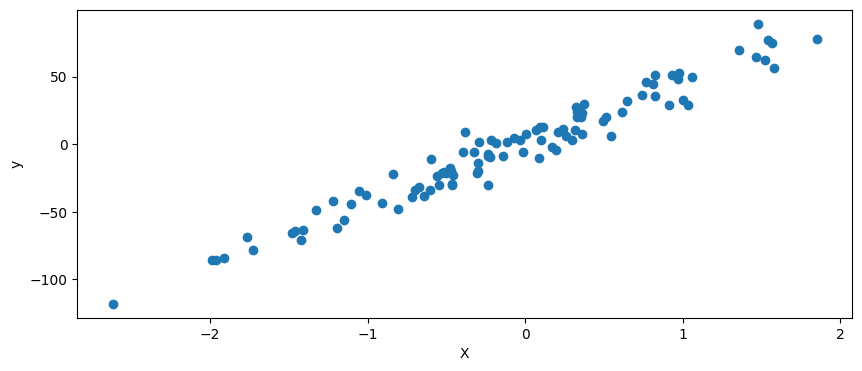

In [42]:
plt.figure(figsize=(10, 4))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y');

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=42
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 1), (80,), (20, 1), (20,))

#Overfitting

In [44]:
from sklearn.tree import DecisionTreeRegressor

tree_over = DecisionTreeRegressor(
    random_state=1
)
tree_over.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [45]:
from sklearn.metrics import mean_squared_error


pred_train_over = tree_over.predict(X_train)
mse_train_over = mean_squared_error(y_train, pred_train_over)

print(f'MSE on the training samples {mse_train_over:.2f}')

MSE on the training samples 0.00


In [46]:
pd.DataFrame({
    'ground truth': y_train,
    'prediction': pred_train_over
})

,ground truth,prediction
0,24.781612,24.781612
1,-37.499144,-37.499144
2,-11.019267,-11.019267
3,61.912333,61.912333
4,46.073157,46.073157
...,...,...
75,27.166487,27.166487
76,-63.166093,-63.166093
77,-47.811465,-47.811465
78,10.491670,10.491670


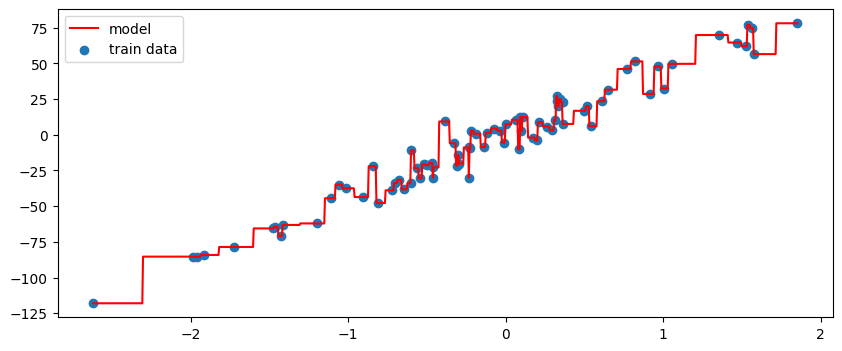

In [47]:
dots = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
pred_dots_over = tree_over.predict(dots)

plt.figure(figsize=(10,4))
plt.plot(dots, pred_dots_over, c='r', label='model');
plt.scatter(X_train, y_train, label='train data')
plt.legend();

In [48]:
pred_test_over = tree_over.predict(X_test)
mse_test_over = mean_squared_error(y_test, pred_test_over)

print(f'MSE on the test samples {mse_test_over:.2f}')

MSE on the test samples 226.23


In [49]:
pd.DataFrame({
    'ground truth': y_test,
    'prediction': pred_test_over
})

,ground truth,prediction
0,-48.949080,-63.166093
1,89.033145,64.576002
2,44.409196,51.399979
3,-5.911314,9.317869
4,-7.624431,-29.996284
5,1.747639,-20.198703
6,-29.365934,-30.068883
7,-68.326754,-78.591791
8,35.765733,51.399979
9,50.779929,28.579735


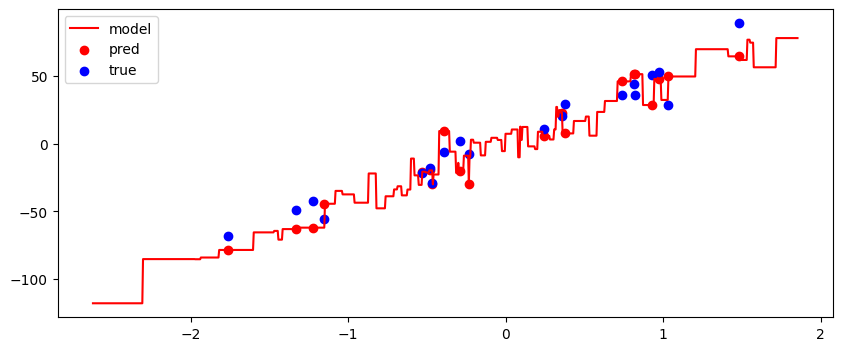

In [50]:
plt.figure(figsize=(10,4))
plt.plot(dots, pred_dots_over, c='r', label='model');
plt.scatter(X_test, pred_test_over, c='r', label='pred')
plt.scatter(X_test, y_test, c='b', label='true')
plt.legend();

#Underfitting



In [51]:
from sklearn.tree import DecisionTreeRegressor

tree_under = DecisionTreeRegressor(
    random_state=1,
    max_depth=1,
)
tree_under.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=1)

In [52]:
pred_train_under = tree_under.predict(X_train)
mse_train_under = mean_squared_error(y_train, pred_train_under)

print(f'MSE (Train) {mse_train_under:.2f}')

MSE (Train) 678.76


In [53]:
pd.DataFrame({
    'ground truth': y_train,
    'prediction': pred_train_under
})

,ground truth,prediction
0,24.781612,23.667856
1,-37.499144,-39.598835
2,-11.019267,-39.598835
3,61.912333,23.667856
4,46.073157,23.667856
...,...,...
75,27.166487,23.667856
76,-63.166093,-39.598835
77,-47.811465,-39.598835
78,10.491670,23.667856


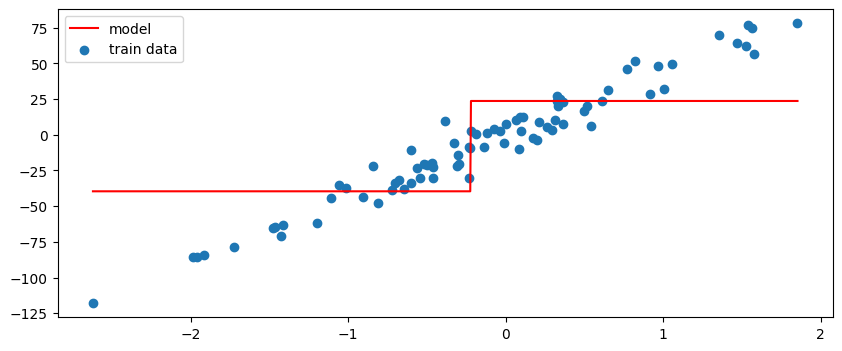

In [54]:
dots = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
pred_dots_under = tree_under.predict(dots)

plt.figure(figsize=(10,4))
plt.plot(dots, pred_dots_under, c='r', label='model');
plt.scatter(X_train, y_train, label='train data')
plt.legend();

In [55]:
pred_test_under = tree_under.predict(X_test)
mse_test_under = mean_squared_error(y_test, pred_test_under)

print(f'MSE (Test) {mse_test_under:.2f}')

MSE (Test) 639.17


In [56]:
pd.DataFrame({
    'ground truth': y_test,
    'prediction': pred_test_under
})

,ground truth,prediction
0,-48.949080,-39.598835
1,89.033145,23.667856
2,44.409196,23.667856
3,-5.911314,-39.598835
4,-7.624431,-39.598835
5,1.747639,-39.598835
6,-29.365934,-39.598835
7,-68.326754,-39.598835
8,35.765733,23.667856
9,50.779929,23.667856


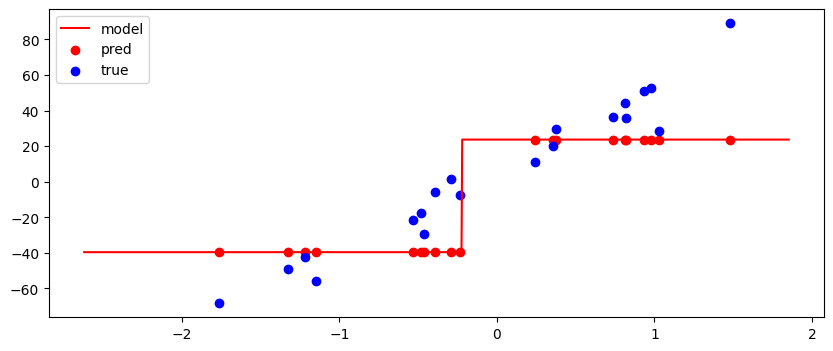

In [57]:
plt.figure(figsize=(10, 4))
plt.plot(dots, pred_dots_under, c='r', label='model');
plt.scatter(X_test, pred_test_under, c='r', label='pred')
plt.scatter(X_test, y_test, c='b', label='true')
plt.legend();

#Normal fitting

In [58]:
from sklearn.tree import DecisionTreeRegressor

tree_ok = DecisionTreeRegressor(
    random_state=1,
    max_depth=4,
    min_samples_leaf=3
)
tree_ok.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=3, random_state=1)

In [59]:
pred_train_ok = tree_ok.predict(X_train)
mse_train_ok = mean_squared_error(y_train, pred_train_ok)

print(f'MSE(Train) {mse_train_ok:.2f}')

MSE(Train) 58.63


In [60]:
pd.DataFrame({
    'ground truth': y_train,
    'prediction': pred_train_ok
})

,ground truth,prediction
0,24.781612,23.646173
1,-37.499144,-40.124465
2,-11.019267,-22.444672
3,61.912333,65.450114
4,46.073157,42.017624
...,...,...
75,27.166487,23.646173
76,-63.166093,-65.411368
77,-47.811465,-35.176234
78,10.491670,0.569629


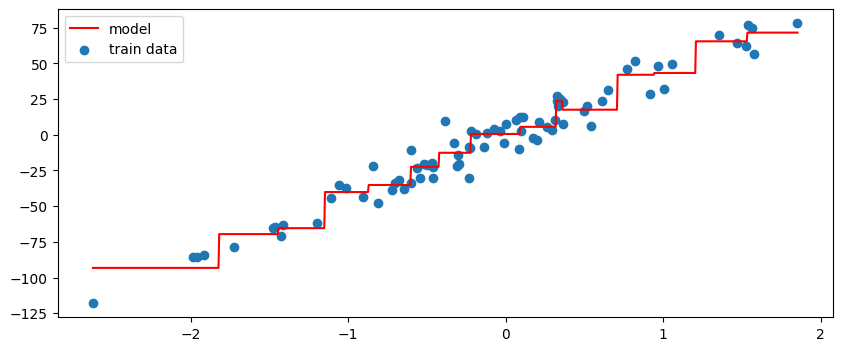

In [61]:
dots = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
pred_dots_ok = tree_ok.predict(dots)

plt.figure(figsize=(10,4))
plt.plot(dots, pred_dots_ok, c='r', label='model');
plt.scatter(X_train, y_train, label='train data')
plt.legend();

In [62]:
pred_test_ok = tree_ok.predict(X_test)
mse_test_ok = mean_squared_error(y_test, pred_test_ok)

print(f'MSE(Test) {mse_test_ok:.2f}')

MSE(Test) 130.75


In [63]:
pd.DataFrame({
    'ground truth': y_test,
    'prediction': pred_test_ok
})

,ground truth,prediction
0,-48.949080,-65.411368
1,89.033145,65.450114
2,44.409196,42.017624
3,-5.911314,-12.613098
4,-7.624431,-12.613098
5,1.747639,-12.613098
6,-29.365934,-22.444672
7,-68.326754,-69.566570
8,35.765733,42.017624
9,50.779929,42.017624


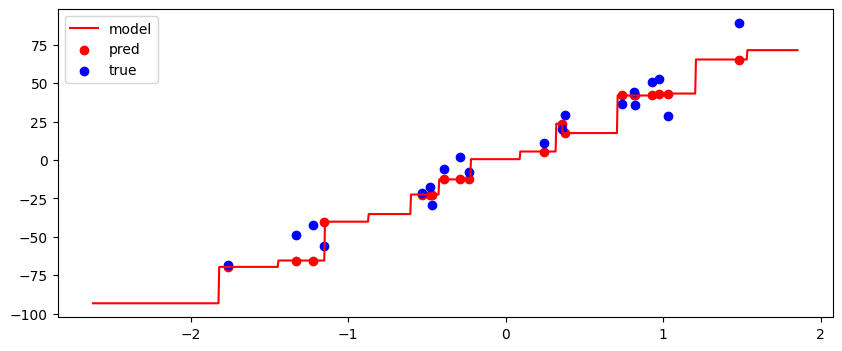

In [64]:
plt.figure(figsize=(10,4))
plt.plot(dots, pred_dots_ok, c='r', label='model');
plt.scatter(X_test, pred_test_ok, c='r', label='pred')
plt.scatter(X_test, y_test, c='b', label='true')
plt.legend();

#Summary

Let's plot all three graphs side by side.
Underlearning - the model did not even try to understand what was happening with the data.

Perfect learning - the model grasped the general message of the data.

Overlearning - the model tried so hard to understand what the data is about that it memorized everything in the training.

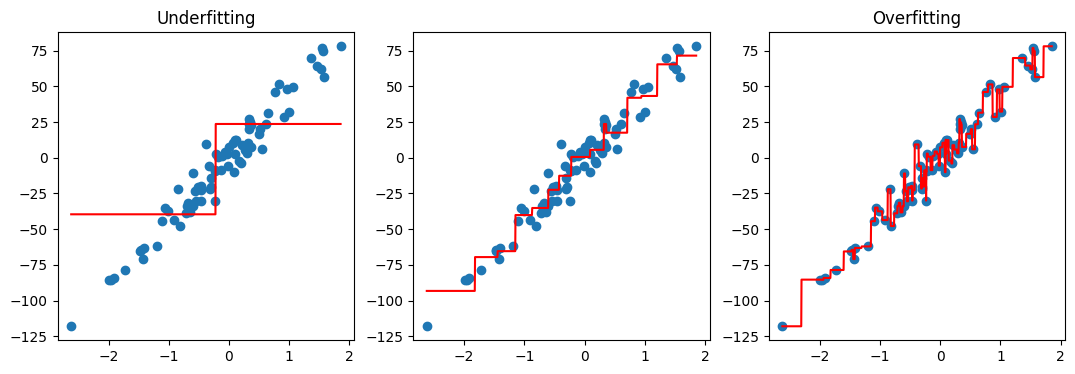

In [65]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4))


ax[0].plot(dots, pred_dots_under, c='r');
ax[0].scatter(X_train, y_train)
ax[0].set_title('Underfitting')

ax[1].plot(dots, pred_dots_ok, c='r');
ax[1].scatter(X_train, y_train)

ax[2].plot(dots, pred_dots_over, c='r');
ax[2].scatter(X_train, y_train)
ax[2].set_title('Overfitting');

In [66]:
mses = [
    [mse_train_under, mse_train_ok, mse_train_over],
    [mse_test_under, mse_test_ok, mse_test_over]
]

In [67]:
pd.DataFrame(
    mses,
    columns=['Under', 'OK', 'Over'], index=['Train', 'Test']
)

,Under,OK,Over
Train,678.756338,58.626306,0.000000
Test,639.166837,130.747148,226.228792


Undertraining - metrics are poor on both the training and the test.

Good training - both metrics are pretty good.

Overtraining - metrics on training are excellent, but not so good on the test.